# Scraping data from website using pandas

This notebook consists of scraping website content using pandas. The idea is to scrip the table on the link below. This Wikipedia page has many contents including three tables as you can see by inspecting the page. The core of this work is to select the table we want and present content in the data frame.

**List of largest companies in the United States by revenue**

Here is the list on wikipedia. [Link to the list](https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue)

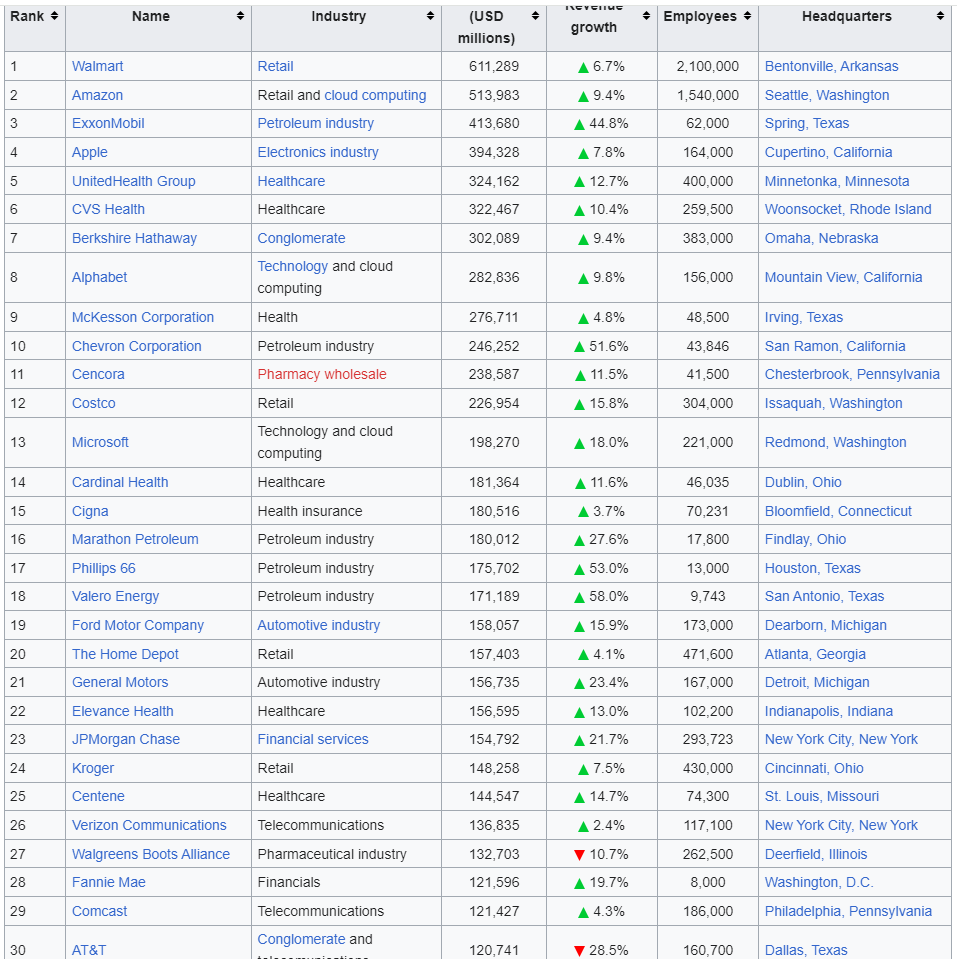


In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [2]:
# Get url and content on the page

url = "https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue"
page = requests.get(url)
soup = BeautifulSoup(page.text, "html")

In [3]:
# This print out all information are on the page

#print(soup)

In [4]:
# This code find and print the first table on the page, we need the second tbale

#soup.find('table')

In [5]:
# We serach all tables and use index 1 to just print second table beacuse we have 3 tables on the page

soup.find_all('table')[1]

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [6]:
# In case you have many classes, instead of using index, you can use class name

#soup.find('table', class_ = 'wikitable sortable')

In [7]:
# Let us create a varible table 

table = soup.find_all('table')[1]

In [8]:
print(table)

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [9]:
# In our table, let us find titles

world_titles = table.find_all('th')
world_titles

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [10]:
# We need to clean our list to have text

world_table_titles = [title.text.strip() for title in world_titles]

print(world_table_titles)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [11]:
# Put our titles in pandas

df = pd.DataFrame(columns = world_table_titles)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [12]:
# Let us find data in table rows

column_data = table.find_all('tr')
#column_data

In [13]:
# Here we are taking the lenght of our df and append data in a row to every row

for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    #print(individual_row_data)
    
    length = len(df)
    df.loc[length] = individual_row_data

In [14]:
# Print out our table in df

df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


In [15]:
#df.to_csv(r'path\filename.csv', index = False)